# Lesson 02: Rates and Efficiencies
### Dylan Temples 
June 24, 2019

The goal of this lesson is to illustrate the effects of trigger and cut efficiencies as well as demonstrate the use of the radionuclide tables.

## Learning Objectives
Physics Topics:
- Nuclear decays and radiation spectra
- Detector efficiencies

Programming Topics:
- 

## $^{127}$Xe Electron-capture decays
$^{127}$Xe is a radioactive isotope of xenon which decays by electron capture. In this process, an inner shell electron (K-, L-, or M- shell) is abosrbed by a proton in the nucleus, turning it into a neutron and emitting a neutrino in the process. Often, this capture leaves the $^{127}I$ nucleus in an excited state. This excited nuclear state will decay with some characteristic lifetime by emitting some series of $\gamma$'s (photons), these are the *primary* particles emitted in the decay.

The electron that was captured by the nucleus leaves a vacancy in one of the inner electron orbitals (shells). This is an unstable state for an atom to be in, and thus it wants to decay to some stable state. The unstable state relaxes through the process of an electron from a higher orbital dropping down to fill the more-inner vacancy. There is an energy difference between the orbitals, so as the electron goes to a lower energy state, the atom must emit some energy. This emission is in the form of $x$-ray photons, some of which have a large probability of knocking out another electron from the atom (Auger electron), these photons and electrons are the *secondary* particles of the decay. This process of outer-shell electrons droppping down to fill inner-shell vacancies continues until all inner-shell vacancies are filled and leaves a highly ionized iodine atom.

The resulting x-ray (and thus Auger electron) energy spectrum is characteristic of the element, and thus can be used for identification of materials.

## Using the Radionuclide Tables
The energies of the particles emitted in radioactive decays of specific isotopes are relatively well-known and tabulated in many locations available online. One of which is hosted by the "IAEA - Nuclear Data Section", available at https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html.

Go to this page, and search for the isotope $^{127}$Xe, and go tot he "Decay Radiation" tab. From the numbers given here, one can estimate the relative intensities of the $K$-shell capture peak and the $L$-shell capture peak.

In [6]:
# -- Auger electron intensities

# intensity of Ae: filling an L-shell vacancy
Int_AU_L00 = 0.96600  
Int_AU_KLL = 0.07800   # intensity of Ae: filling an K-shell vacancy w/ L-shell electron, emitting L-shell Ae
Int_AU_KLX = 0.03590   # intensity of Ae: filling an K-shell vacancy w/ L-shell electron, emitting any other shell Ae
Int_AU_K00 = 0.11800   # intensity of Ae: filling an K-shell vacancy
Int_AU_KXY = 0.00412   # intensity of Ae: filling an K-shell vacancy w/ any other shell electron, emitting Ae from any other shell

print(Int_AU_K00-Int_AU_KLL-Int_AU_KLX-Int_AU_KXY)

-2.000000000000786e-05


In [7]:
# -- For each K-shell decay, how many L-shells do you expect?
Int_L_to_K = Int_AU_L00 / Int_AU_K00

print(Int_L_to_K)
# Note that this is really the intensities of Auger electrons, we have
# neglected the contribution to the K-shell from X-rays

8.186440677966102


## $^{127}$Xe Decays in XELDA
As noted above, an electron capture on any specific shell results in secondary particles with kinetic energ that sums to a characteristic value -- roughly the binding energy of the captured electron. For $^{127}$Xe (really $^{127}$I) the energies are $33.2$($5.2$) keV for the $K-$($L-$)shell. The entire energy release in the decay is this plus the energy of all the $\gamma$s coming from the nuclear decay.

In XELDA, the $\gamma$s are too-high in energy to be well resolved, this is by design because we are not interested in them. We are specifically interested in the secodary effects: the relaxation of the excited atomic state. Thus, we are looking for peaks in energy near the binding energies -- these are events where all the $\gamma$s escaped the detector without interacting, and we have isolated $x$-ray/Auger effects.

This, coupled with other effects introduces a relative efficiency in detecting isolated $^{127}$Xe captures on different shells. The objective of this lesson/assignment is to determine what the relative efficicency between the $K-$ and $L-$shells.

In [13]:
# -- Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [14]:
# -- Open the data
filename = "rawdaq_1901021108_parsed.dat"
data = np.loadtxt(filename, delimiter=",")

# -- Save data as arrays
EvtID_array = data[:,0]  # first column
S1_array    = data[:,1]  # second column
S2_array    = data[:,2]  # third column
TS2_array   = data[:,3]  # fourth column
DT_array    = data[:,4]  # fifth column
R2_array    = data[:,5]  # sixth column

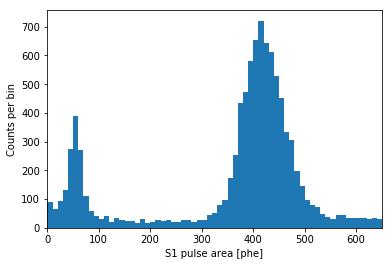

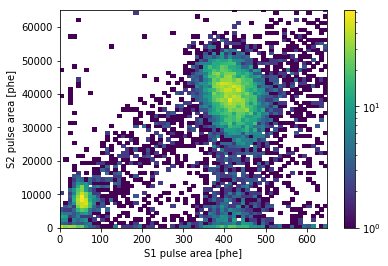

In [18]:
# -- Define cuts
dt_cut_lims    = np.array([2.5, 7.5])
dt_cut_indexer = (DT_array >= dt_cut_lims[0]) * (DT_array <= dt_cut_lims[1])

# -- Define bins
n_s1s2_bins = 100

# -- Create a 1D histogram of S1 size
plt.figure(0)
plt.hist(S1_array[dt_cut_indexer], bins=n_s1s2_bins)
plt.xlabel("S1 pulse area [phe]")
plt.ylabel("Counts per bin")
plt.xlim([0.0 , 650.0])

# -- Create a 2D histogram of S1 size vs S2 size
plt.figure(1)
plt.hist2d(S1_array[dt_cut_indexer],S2_array[dt_cut_indexer], bins=n_s1s2_bins, norm=LogNorm())
plt.xlabel("S1 pulse area [phe]")
plt.ylabel("S2 pulse area [phe]")
plt.xlim([0.0 , 650.0])
plt.ylim([0.0 , 650e2])
plt.colorbar()